<a href="https://colab.research.google.com/github/abigail2rose/NGG6050/blob/main/0930.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import linregress, pearsonr, t
import matplotlib.pyplot as plt

age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.2, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])



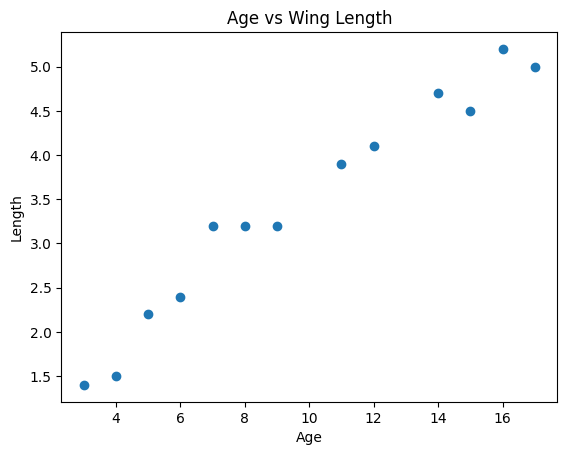

In [2]:
# Question 1: Plot the relationship between Age and Wing Length.
plt.scatter(age, wing_length)
plt.title('Age vs Wing Length')
plt.xlabel('Age')
plt.ylabel('Length')
plt.show()


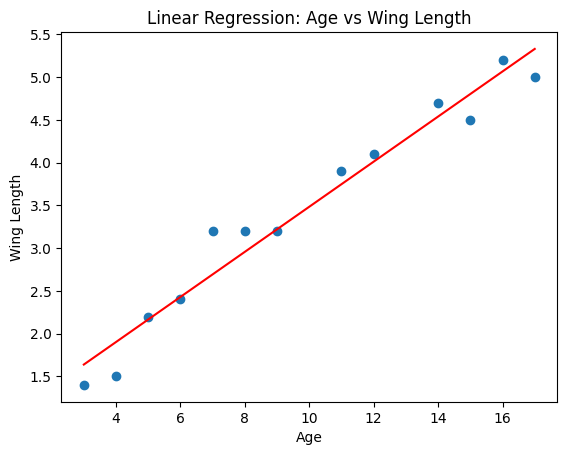

slope: 0.2636596471257826
intercept: 0.8473249857712002


In [3]:
# Question 2: Calculate and plot the regression line.
results = linregress(age, wing_length)
slope, intercept = results.slope, results.intercept
wing_length_pred = slope * age + intercept
plt.scatter(age, wing_length)
plt.plot(age, wing_length_pred, color='r')
plt.title('Linear Regression: Age vs Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()
print(f'slope: {slope}')
print(f'intercept: {intercept}')


In [4]:
# Question 3: reject null hypothesis
p_value = results.pvalue
if p_value < 0.05:
    print('Reject the null hypothesis (p < 0.05)')
else:
    print('Fail to reject the null hypothesis (p >= 0.05)')

Reject the null hypothesis (p < 0.05)


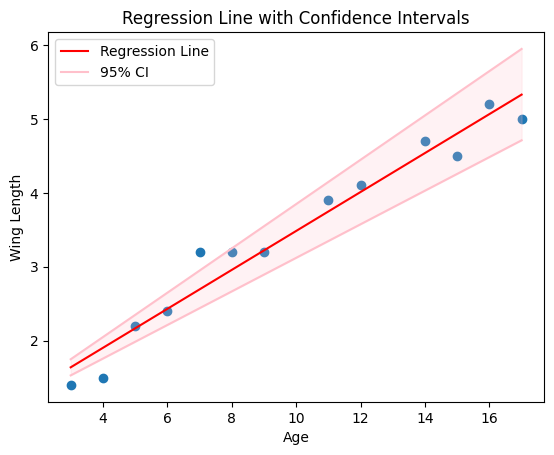

In [5]:
# Question 4: Calculate and plot confidence intervals for the slope
n = len(age)
alpha = 0.05
t_value = t.ppf(1 - alpha / 2, n - 2)
stderr_slope = results.stderr # The standard error of the estimated slope.

# Confidence intervals for slope and intercept
confidence_interval_low = slope - t_value * stderr_slope
confidence_interval_high = slope + t_value * stderr_slope

# Calculate predictions for confidence intervals
confidence_interval_low_pred = confidence_interval_low * age + intercept
confidence_interval_high_pred = confidence_interval_high * age + intercept

# Plot regression line with confidence intervals
plt.scatter(age, wing_length)
plt.plot(age, wing_length_pred, color='r', label='Regression Line')
plt.plot(age, confidence_interval_low_pred, color='pink', label='95% CI')
plt.plot(age, confidence_interval_high_pred, color='pink')
plt.fill_between(age, confidence_interval_low_pred, confidence_interval_high_pred, color='pink', alpha=0.2)
plt.title('Regression Line with Confidence Intervals')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()

In [9]:
# Q 5: Calculate coefficient of determination
r_squared = results.rvalue ** 2
print(f'R-squared: {r_squared}')

R-squared: 0.9585648370037576


In [10]:
# Q 6: Calculate Pearson's r
pearson_r, _ = pearsonr(age, wing_length)
print(f"Pearson's r: {pearson_r}")

Pearson's r: 0.9790632446393633


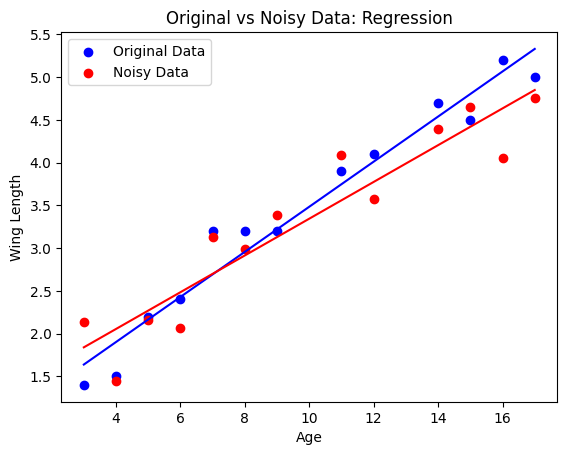

Noisy Data Regression - Slope: 0.21, Intercept: 1.19
Pearson's r (noisy data): 0.939
R-squared (noisy data): 0.883


In [8]:
# Q 7: Add noise to the data and perform new regression
noise = np.random.normal(0, 0.5, len(age))
wing_length_noisy = wing_length + noise

# New regression with noisy data
noisy_results = linregress(age, wing_length_noisy)
slope_noisy = noisy_results.slope
intercept_noisy = noisy_results.intercept
wing_length_noisy_pred = slope_noisy * age + intercept_noisy

# Plot original vs noisy data
plt.scatter(age, wing_length, label='Original Data', color='blue')
plt.plot(age, wing_length_pred, color='blue')
plt.scatter(age, wing_length_noisy, label='Noisy Data', color='red')
plt.plot(age, wing_length_noisy_pred, color='red')
plt.title('Original vs Noisy Data: Regression')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()

# Print details for noisy regression
print(f'Noisy Data Regression - Slope: {slope_noisy:.2f}, Intercept: {intercept_noisy:.2f}')
print(f"Pearson's r (noisy data): {noisy_results.rvalue:.3f}")
print(f'R-squared (noisy data): {noisy_results.rvalue**2:.3f}')
